<a href="https://colab.research.google.com/github/JacobTumak/SentimentAnalysisProject/blob/main/Sentiment_Analysis_Pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import packages and get trained  from my google drive**

In [ ]:
import json
import nltk
from dataclasses import dataclass
from nltk import (sent_tokenize, word_tokenize)
from nltk.tokenize import RegexpTokenizer
nltk.download(['punkt', 'stopwords'])
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))
stop_words.add('br')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
with open("/content/drive/MyDrive/Train/test_file.txt", 'r') as json_file:
  data_set = json.load(json_file)

# Steal word_frequency function from other colab doc

In [ ]:
# def fetch_data(identifier, min_index, max_index): # Uses "append" method
#   output_var = []
#   for i in range(min_index, max_index + 1):
#     for j in range(-1,11):
#       try:
#         output_var.append((open(f'/content/gdrive/My Drive/Train/Test/{identifier}/{i}_{j}.txt', 'r')).read())
#       except:
#         continue
#   return output_var

# def process_data(data_set):
  
#   data_set = word_tokenize(data_set.lower()) # seperates strings into lists of words in original order
#   processed_set = [word for word in data_set if word not in stop_words and word.isalpha()]

#   # data_set = [data_set[i][j] for i in range(len(data_set)) for j in range(len(data_set[i])) if data_set[i][j].lower() not in stop_words and data_set[i][j].isalpha()]
#   # ["".join(word.lower()) for word in data_set]
#   return processed_set

def word_frequency(list1, list2):
  top_words = {}
  for word in list1:
    if word in top_words.keys():
      top_words[word] += 1
    else:
      top_words[word] = 1
    for word in list2:
      if word not in list1:
        top_words[word] = 0
        
  return dict(sorted(top_words.items(), key=lambda x:x[1], reverse=True))

#**Build functions to find words that are present in each review in the dataset.**
Important to keep each review seperated

In [ ]:
def fetch_data(identifier, index):
  output_var = []
  for j in range(0,11):
    try:
      output_var = open(f'/content/drive/MyDrive/Train/Test/{identifier}/{index}_{j}.txt', 'r').read()
    except:
      continue
  return output_var

In [ ]:
def count_words(reviews):
  word_frequency = [{'data': {'word frequency': seperate_data(remove_stopwords(review)), 'rating': 'unrated', 'sentiment':'to be determined'}, 'review': review} for review in reviews]
  return word_frequency

In [ ]:
def remove_stopwords(data_set):
  data_set = [word_tokenize(data_set)] # seperates strings into lists of words in original order
  data_set = [data_set[i][j].lower() for i in range(len(data_set)) for j in range(len(data_set[i])) if data_set[i][j].lower() not in stop_words and data_set[i][j].isalpha()]
  ["".join(word) for word in data_set]
  return data_set

In [ ]:
def seperate_data(filtered_review):
  seperated_data = {word : 0 for word in filtered_review} 
  for word in filtered_review:
    seperated_data[word] +=1
  return seperated_data

#**build functions to predict sentiment of individual reviews based on trained data set.**

In [ ]:
def analyse_review_data(rev_set, analysis_model, bias): # Data format is either processed data set or raw text
  for review in rev_set:      # compile list of like words from data
    score = float(0);  words_scored = float(0)
    for word in review['data']['word frequency']:
      if word in analysis_model:
        score += analysis_model[word]['Positive']['Dist']
        words_scored += 1
    review['data']['rating'] = round((score/words_scored)*100, 2)
    if score/words_scored >= bias:  # (Later on) Test altering bias towards positive or negative reviews and find value correlated with highest accuracy
      review['data']['sentiment'] = 'positive'
    else:
      review['data']['sentiment'] = 'negative'
      review['data']['rating'] = 100.00 - review['data']['rating']

In [ ]:
def get_accuracy(rev_set, rev_set_type):
  accuracy = 0
  for index in rev_set:
    if index['data']['sentiment'] == rev_set_type:
      accuracy += 1
  accuracy = round((accuracy/len(rev_set))*100, 2)
  return accuracy

In [ ]:
neg_reviews = [fetch_data('neg', review) for review in range(500)]
negative_data = count_words(neg_reviews)

In [ ]:
pos_reviews = [fetch_data('pos', review) for review in range(500)]
positive_data = count_words(pos_reviews)

In [ ]:
analyse_review_data(negative_data, data_set, 0.516)
analyse_review_data(positive_data, data_set, 0.516)

In [ ]:
print(f'''accuracy for negative data: {get_accuracy(negative_data, 'negative')}%
accuracy for positive data: {get_accuracy(positive_data, 'positive')}%''')

accuracy for negative data: 85.2%
accuracy for positive data: 86.2%


In [ ]:
#[f'''{index['data']['rating']}% {index['data']['sentiment']}''' for index in negative_data]

**Notes:** 


*   The accuracy of the analyzation algorithm decreases dramatically when handling negative reviews as opposed to positive reviews.
>Possibly because it takes more motivation for people to write positive reviews than it does to write neg reviews. Therefore positive reviews may be more dramatically positive which causes a higher accuracy due to easier detection.



#Graph how change in pos vs neg bias affects accuracy

Create a graph with accuracy as x-axis and bias as x-axis

The intersection between the two graphs can be used to calibrate the bias of the MLM (Machine Learning Model)

In [ ]:
neg_accuracy = []
pos_accuracy = []
for percent in range(1000):
  analyse_review_data(negative_data, data_set, percent/1000)
  analyse_review_data(positive_data, data_set, percent/1000)
  neg_accuracy.append(get_accuracy(negative_data, 'negative'))
  pos_accuracy.append(get_accuracy(positive_data, 'positive'))

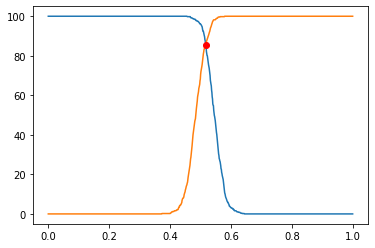

array([516])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [number/1000 for number in range(1000)]
pos_array = np.array(pos_accuracy)
neg_array = np.array(neg_accuracy)
x_array = np.array(x)

plt.plot(x_array, pos_array)
plt.plot(x_array, neg_array)

idx = np.argwhere(np.diff(np.sign(pos_array - neg_array))).flatten()
plt.plot(x_array[idx], neg_array[idx], 'ro')
plt.show()

idx

#**Re-Create above code to add and store data in a dataclass "Sentiment_data"**

In [ ]:
@dataclass
class Sentiment_Data:
  file_name: str
  review: str
  word_frequency: dict
  rating: float                   # stars given to the review by reviewer
  known_sentiment: str            
  calculated_sentiment: str       # guess made by algorithm based on inputted data model

# **Sentiment analysis method: 2**
In this method I use a data set I made containing common adjectives and adverbs. I'll use the data set to find sets (combinations) of adverb+adjective pairings. These pairings (phrases) will be given a sentiment score which will be determined by assigning the phrase a value (1 for positive, -1 for negative) and dividing it by the index of the phrase of all the phrases in the text.

In [ ]:
# Import phrase data set from my g-drive
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Trial2Spreadsheet').sheet1

I found the simplest way to create this data set to import was on google sheets. The following code sorts the sheets data into a structured data set which we can use for sentiment analysis.

In [ ]:
# Sorting sheets data into structured set for easier use later on
rows = worksheet.get_all_values()
data_set = dict()
data_set['pos adj'] = [row[0].lower() for row in rows if row[0] != ""]
data_set['neg adj'] = [row[1].lower() for row in rows if row[1] != ""]
data_set['pos adv'] = [row[2].lower() for row in rows if row[2] != ""]
data_set['neg adv'] = [row[3].lower() for row in rows if row[3] != ""]

In [ ]:
data_set['neg adj']

Now moving on to the test preperation, functions are built to do the following in order to process the data and prep it for analysis:
1. Punctuation removal
2. Stemming - taking the roots of the word ie; "waiting" becomes "wait"
3. Removing Stopwords - removes all words that aren't adjectives or adverbs ( for this case)

In [ ]:
neg_reviews = [fetch_data('neg', review) for review in range(10)]

In [ ]:
neg_reviews[6]

'A tough sell: British playwright Ronald Harwood adapts his autobiographical stage drama into loud, bellowing film about WWII Shakespearean theatrical troupe saddled with an aged, blustery, brilliant-but-unreliable star at the end of his tether. The actor\'s effete assistant works diligently to get his master coiffed and costumed for a production of "King Lear" (during an Air Raid!), yet both men are losing their grip on their unraveling situation. Based on the waning years of actor Donald Wolfit, whose dresser was Ronald Harwood, this acclaimed production would seem to be a welcome haven for scenery-chewing thespians. Unfortunately, Albert Finney (at this point in his career, not at all elderly) seems too robust and quick-thinking to play the actor; Finney (and Oscar-nominated director Peter Yates) cannot modulate Sir\'s moods and bouts of coherency in a way that makes sense to us, so that in one scene he\'s stopping a train with the commanding echo of his voice, and in the next he\'s

In [ ]:
for review in neg_reviews:
  word_list = remove_stopwords(review)
  phrases = [(word, word_list[word_list.index(word) + 1]) for word in word_list if word_list.index(word) + 1 < len(word_list)]
  print([phrase for phrase in phrases if phrase[0] in data_set['neg adj'] or phrase[0] in data_set['neg adv']])
  print([phrase for phrase in phrases if phrase[0] in data_set['pos adj'] or phrase[0] in data_set['pos adv']])

[('dragged', 'movie'), ('cocky', 'overconfident'), ('overconfident', 'ashton'), ('stinker', 'costner')]
[('better', 'anyone')]
[('pale', 'imitation'), ('hackneyed', 'long'), ('confusing', 'kutcher')]
[('love', 'interest'), ('love', 'interest'), ('free', 'certainly')]
[('ever', 'since'), ('yet', 'one'), ('terrible', 'richard'), ('never', 'care'), ('never', 'care'), ('never', 'care')]
[('great', 'etc'), ('great', 'etc')]
[('supposed', 'awe')]
[('better', 'movies'), ('kind', 'movie'), ('good', 'slightly')]
[('unrelated', 'string'), ('ever', 'develops')]
[('real', 'front')]
[('sadistic', 'demands'), ('none', 'fresh'), ('none', 'fresh'), ('weak', 'get')]
[('calm', 'none'), ('kind', 'documentary'), ('safety', 'lives')]
[('loud', 'bellowing'), ('yet', 'men'), ('unfortunately', 'albert'), ('yet', 'men')]
[('dedicated', 'assistant'), ('great', 'lengths'), ('real', 'feeling'), ('careful', 'fall')]
[('never', 'engages'), ('supposed', 'give'), ('never', 'engages'), ('ever', 'came'), ('difficult', 

In [ ]:
neg_review_data = count_words(neg_reviews)
pos_review_data = count_words(pos_reviews)